# Introduction to time series forecasting

## What is Time Series Forecasting?
A time series is a sequence of observations taken sequentially in time.

| Time   | Observation |
|--------|-------------|
| Time #1 | observation |
| Time #2 | observation |
| Time #3 | observation |


These observations can represent various measurable quantities collected over time, such as temperature readings, sales figures, revenue numbers, sensor data, or any variable that changes sequentially. Essentially, any data that is recorded at successive time points to analyze trends, patterns, or forecasts falls under time series data.

Now let's see an example.

2022-01-01    17.496437
2022-01-02    18.474171
2022-01-03    17.131108
2022-01-04    13.397729
2022-01-05     5.696826
Freq: D, dtype: float64


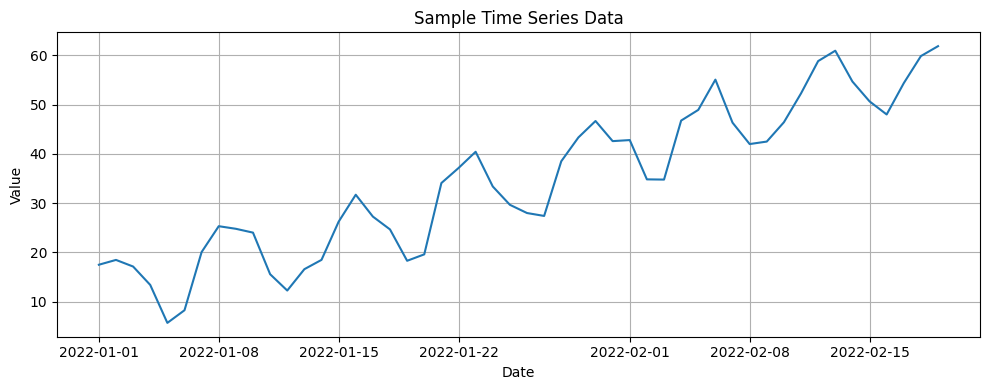

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dates
dates = pd.date_range(start='2022-01-01', periods=50, freq='D')

# Create a time series: Trend + Seasonality + Noise
np.random.seed(42)
trend = np.linspace(10, 60, 50)
seasonality = 8 * np.sin(2 * np.pi * dates.dayofyear / 7)
noise = np.random.normal(0, 2.5, 50)
values = trend + seasonality + noise

# Create pandas Series
series = pd.Series(values, index=dates)

# Display first 5 rows
print(series.head())

# Plot the series
plt.figure(figsize=(10, 4))
plt.plot(series)
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


## Time Series Nomenclature


*   Current time -> `t`
*   `t-n`: A prior or lag time (e.g. `t-1` for the previous time).
*   `t+n`: A future or forecast time (e.g. `t+1` for the next time).





## Importance of Analyzing Historical Data Before Forecasting
- Understanding historical data is a crucial first step before any forecasting.
- Analyzing past data provides insights into trends, patterns, and behaviors, even if forecasting is not the immediate goal.
- When forecasting, exploratory data analysis (EDA) on historical data is essential to ensure model accuracy and reliability.
- EDA uncovers seasonality, trends, anomalies, and structural changes that influence forecasting.
- It also helps identify data quality issues like missing values or outliers that must be addressed beforehand.
- Proper analysis of historical data forms the foundation for selecting forecasting techniques and making informed decisions.
- Skipping this step can lead to poor forecasts and misguided business strategies.

## Components of Time Series
- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend.
- **Seasonality**: A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year, the day of the week or the hour of the day. Seasonality is always of a fixed and known period.
- **Noise**: The optional variability in the observations that cannot be explained by the
model.
- **Cyclic**: A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency.



# Decompose Time Series Data
Time series decomposition method involves with references to trend, seasonlity and noise components. There are two types decomposition techniques.



*   Additive
*   Multiplicative





## Additive Time Series Data
$$
Y_t = T_t + S_t + R_t
$$

- T\_t : Trend component  
- S\_t : Seasonal component (fixed amount)  
- R\_t : Residual component (fixed amount)




/tmp/ipython-input-2119000111.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2018-01-01", periods=n, freq="M")


                 sales       trend  seasonality      noise
date                                                      
2018-01-31  204.967142  200.000000            0   4.967142
2018-02-28  207.091933  208.474576            0  -1.382643
2018-03-31  223.426038  216.949153            0   6.476885
2018-04-30  240.654027  225.423729            0  15.230299
2018-05-31  231.556771  233.898305            0  -2.341534
2018-06-30  240.031512  242.372881            0  -2.341370
2018-07-31  266.639586  250.847458            0  15.792128
2018-08-31  266.996381  259.322034            0   7.674347
2018-09-30  263.101866  267.796610            0  -4.694744
2018-10-31  281.696787  276.271186            0   5.425600
2018-11-30  280.111586  284.745763            0  -4.634177
2018-12-31  308.563041  293.220339           20  -4.657298
2019-01-31  304.114538  301.694915            0   2.419623
2019-02-28  291.036689  310.169492            0 -19.132802
2019-03-31  301.394889  318.644068            0 -17.2491

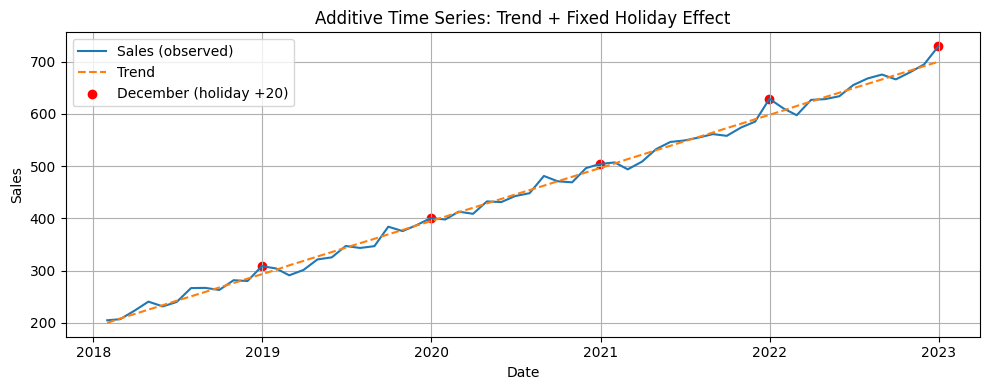

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Parameters
years = 5                   # number of years
periods_per_year = 12       # monthly data
n = years * periods_per_year

# Time index: monthly dates
dates = pd.date_range(start="2018-01-01", periods=n, freq="M")

# Trend: start at 200, increase 100 units per year (~8.33 per month)
trend = 200 + np.linspace(0, 100 * years, n)

# Additive seasonality: +20 units every December, 0 otherwise
seasonality = np.where(dates.month == 12, 20, 0)

# Random noise
noise = np.random.normal(loc=0, scale=10, size=n)

# Additive model: sales = trend + seasonality + noise
sales = trend + seasonality + noise

# Put into a DataFrame for clarity
df = pd.DataFrame({
    "date": dates,
    "sales": sales,
    "trend": trend,
    "seasonality": seasonality,
    "noise": noise
}).set_index("date")

print(df.head(15))  # first 15 months

# Plot full series and highlight December effect
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["sales"], label="Sales (observed)")
plt.plot(df.index, df["trend"], label="Trend", linestyle="--")

# Highlight December points
december_mask = df.index.month == 12
plt.scatter(df.index[december_mask],
            df["sales"][december_mask],
            color="red",
            label="December (holiday +20)")

plt.title("Additive Time Series: Trend + Fixed Holiday Effect")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Multiplicative Time Series Data


$$
Y_t = T_t \times S_t \times R_t
$$

- \(T_t\): Trend component  
- \(S_t\): Seasonal component (factor/percentage)  
- \(R_t\): Residual component (factor/percentage)

$$ Y_t = S_t \times T_t \times R_t \;\text{is equivalent to}\; \log Y_t = \log S_t + \log T_t + \log R_t. $$


/tmp/ipython-input-969363546.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start="2018-01-01", periods=n, freq="M")


                 sales       trend  seasonality_factor  noise_factor
date                                                                
2018-01-31  102.483571  100.000000                 1.0      1.024836
2018-02-28  107.579807  108.328707                 1.0      0.993087
2018-03-31  121.151435  117.351087                 1.0      1.032384
2018-04-30  136.805667  127.124915                 1.0      1.076151
2018-05-31  136.100481  137.712776                 1.0      0.988292
2018-06-30  147.436013  149.182470                 1.0      0.988293
2018-07-31  174.368067  161.607440                 1.0      1.078961
2018-08-31  181.784884  175.067250                 1.0      1.038372
2018-09-30  185.196342  189.648088                 1.0      0.976526
2018-10-31  211.016588  205.443321                 1.0      1.027128
2018-11-30  217.397318  222.554093                 1.0      0.976829
2018-12-31  353.213748  241.089971                 1.5      0.976714
2019-01-31  264.329307  261.169647

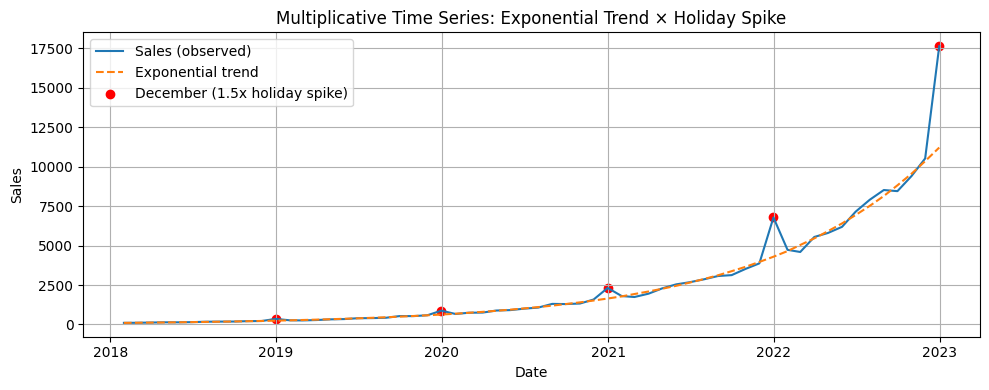

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Parameters
years = 5                    # number of years
periods_per_year = 12        # monthly data
n = years * periods_per_year

# Time index: monthly dates
dates = pd.date_range(start="2018-01-01", periods=n, freq="M")

# Exponential trend: tech company growing over time
# Start level = 100, monthly growth rate ~ 2% (tuned via growth_rate)
growth_rate = 0.08
t = np.arange(n)
trend = 100 * np.exp(growth_rate * t)

# Multiplicative seasonality: 1.5x in December, 1.0 otherwise
seasonality = np.where(dates.month == 12, 1.5, 1.0)

# Multiplicative noise around 1.0 (lognormal style)
noise = np.random.normal(loc=0.0, scale=0.05, size=n)  # small Gaussian noise
noise_factor = 1 + noise                               # centered around 1

# Multiplicative model: sales = trend * seasonality * noise_factor
sales = trend * seasonality * noise_factor

# Put into a DataFrame for clarity
df = pd.DataFrame({
    "date": dates,
    "sales": sales,
    "trend": trend,
    "seasonality_factor": seasonality,
    "noise_factor": noise_factor
}).set_index("date")

print(df.head(15))  # first 15 months

# Plot full series and highlight December (holiday) effect
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["sales"], label="Sales (observed)")
plt.plot(df.index, df["trend"], label="Exponential trend", linestyle="--")

# Highlight December points
december_mask = df.index.month == 12
plt.scatter(df.index[december_mask],
            df["sales"][december_mask],
            color="red",
            label="December (1.5x holiday spike)")

plt.title("Multiplicative Time Series: Exponential Trend × Holiday Spike")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
